# Hello to scikit-learn
DIAS ML course by MT

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns
%matplotlib inline

# Hello world - Linear fit (Linear Regression)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
# initialize the model/classifier 
model = LinearRegression(normalize=True)

In [20]:
model?

In [21]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


In [22]:
# see the hyperparameters
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}

In [23]:
print(model.fit_intercept)

True


In [24]:
# Create some dummy data
x = np.arange(10.)
y = 2. * x + 1. # + 2*np.random.randn(10)
print(x)
print(y)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19.]


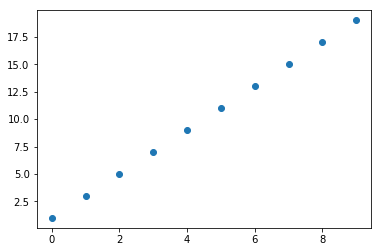

In [25]:
plt.plot(x, y, 'o');

In [26]:
# The input data for sklearn is 2D: (samples == 10 x features == 1)
X = x[:, np.newaxis]
print(X)
print(y)

[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]
 [7.]
 [8.]
 [9.]]
[ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19.]


In [27]:
# fit the model on our data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [28]:
# underscore at the end indicates a fit parameter,
# each estimator can have different parameters
print(model.coef_)
print(model.intercept_)

[2.]
1.0


In [49]:
# evaluate/predict unseen
test_data = np.array([3.3, 8.5]).reshape(-1,1)
print(test_data.shape)
y_test_data = model.predict(test_data)
print(y_test_data)

(2, 1)
[ 7.6 18. ]


In [50]:
# evaluate performance
from sklearn.metrics import mean_squared_error
mean_squared_error(y, model.predict(X))

0.0

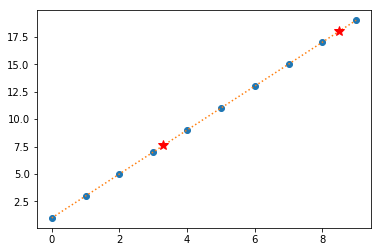

In [55]:
plt.plot(x, y, 'o');
plt.plot(x, model.predict(X),":")
plt.plot(test_data, y_test_data, 'r*', markersize=10)

# Less dummy classification

In [99]:
# hand written digits
from sklearn.datasets import load_digits
digits = load_digits()

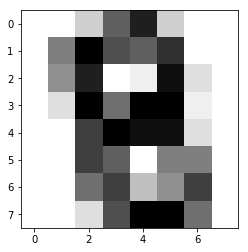

In [100]:
plt.imshow(digits.data[500].reshape(8,8), cmap=plt.cm.binary, interpolation=None)

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=42)

In [102]:
X_train.shape

(1347, 64)

In [103]:
print(np.bincount(y_train))
print(len(np.unique(y_train)))

[135 145 139 137 126 123 136 138 136 132]
10


In [104]:
from sklearn.svm import LinearSVC

In [105]:
# initialize
svm = LinearSVC()
# fit
svm.fit(X_train, y_train)
# predict/evaluate
y_pred = svm.predict(X_test)

/Users/toast/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [106]:
print(svm.predict(X_train))
print(y_train)

[5 2 0 ... 2 7 1]
[5 2 0 ... 2 7 1]


In [107]:
svm.score(X_train, y_train)

0.9881217520415738

In [108]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.96


In [109]:
svm.score(X_test, y_test)

0.96

In [110]:
# newer version of API
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.96

In [116]:
print("accuracy:", metrics.accuracy_score(y_test, y_pred))
print("precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
print("recall:", metrics.recall_score(y_test, y_pred, average='weighted'))
print("f1 score:", metrics.f1_score(y_test, y_pred, average='weighted'))

('accuracy:', 0.9355555555555556)
('precision:', 0.9366603754677906)
('recall:', 0.9355555555555556)
('f1 score:', 0.935514376732122)


In [115]:
print(metrics.classification_report(y_test, y_pred,
                                    target_names=['%s'%i for i in range(10)]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.88      0.84      0.86        43
           2       0.95      0.89      0.92        44
           3       0.86      0.96      0.91        45
           4       0.95      0.97      0.96        38
           5       0.98      0.96      0.97        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.88      0.88      0.88        48
           9       0.92      0.94      0.93        47

   micro avg       0.94      0.94      0.94       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.94      0.94      0.94       450



In [68]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
print(mat)

[[42  0  0  0  1  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  3  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  1  0  0  1  0]
 [ 0  0  0  0 54  0  0  0  1  0]
 [ 0  0  1  0  0 57  0  0  1  0]
 [ 0  0  0  0  0  1 44  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  1  0  0  0  1  0  0 36  0]
 [ 0  0  0  0  0  0  0  0  5 43]]


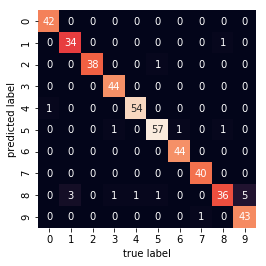

In [69]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

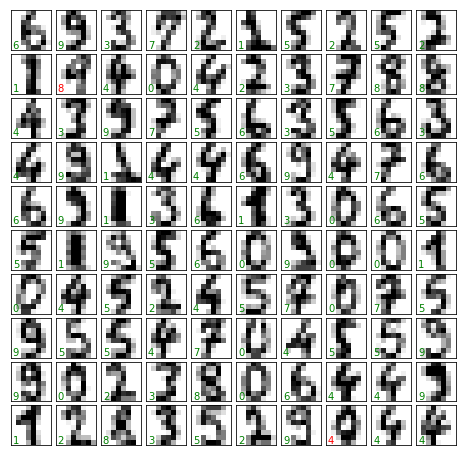

In [77]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(y_pred[i]),
            transform=ax.transAxes,
            color='green' if (y_test[i] == y_pred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])

# Exercise 1

Train and evaluate more models:

- *sklearn.neighbors.KNeighborsClassifier*
- *sklearn.ensemble.RandomForestClassifier*
- *sklearn.linear_model.LogisticRegression* (then with a hyperparameter *penalty='l2'*)

How do these perform on the training set vs the test set? Which one is the best on the training set, which one is the best on the test set?

# Exercise 2
Some of the models have a method *predict_proba*, to inspect probabilites of belonging to individual classes.

Use *sklearn.svm.SVC*, check the model doc, and try to see what would be the probabilities of being what number of a randomly generated image

In [70]:
noise = 1.*np.random.choice(16,size=64)
noise.shape

(64,)

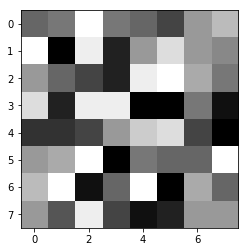

In [72]:
plt.imshow(noise.reshape(8,8), cmap=plt.cm.binary, interpolation=None)

In [113]:
from sklearn.svm import SVC
clf = SVC(probability=True)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [74]:
noise_pred = clf.predict(noise[None,:])
print(noise_pred[0])

8


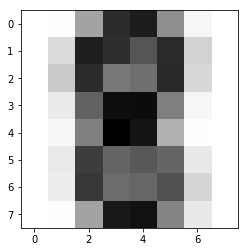

In [75]:
what = np.mean(digits.data[digits.target==noise_pred[0],:], axis=0)
plt.imshow(what.reshape(8,8), cmap=plt.cm.binary, interpolation=None)

<BarContainer object of 10 artists>

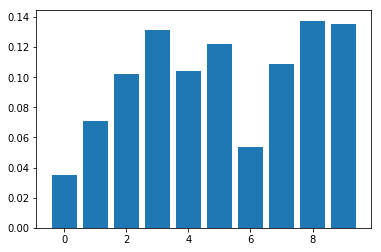

In [76]:
plt.bar(np.arange(10),clf.predict_proba(noise[None,:])[0])

# Exercise 4
Run the classification on PCA-ed data, use RF and SVC with *kernel='rbf'*

In [194]:
https://github.com/jakevdp/ESAC-stats-2014/blob/master/notebooks/05.3-Density-GMM.ipynb

SyntaxError: invalid syntax (<ipython-input-194-f9fb04f19c7d>, line 1)

# Exercise 5 (Uneven Classes)
Modify the sets to look uneven. The accuracy increases. Why?

Check the weights keyword